<a href="https://colab.research.google.com/github/ANanade/Natural-Language-Processing/blob/master/Handwritten_digit_recognization_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Define transforms
## YOUR CODE HERE ##
from torchvision import datasets, transforms

def get_data_loader(batch_size):
    transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.1307,), (0.3081,)),
                              ])

    # Create training set and define training dataloader
    ## YOUR CODE HERE ##
    train_data = datasets.MNIST('./data', download=True, train=True, transform=transform)
    test_data = datasets.MNIST('./data', download=True, train=False, transform=transform)


    # Create test set and define test dataloader
    ## YOUR CODE HERE ##
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)
    
    return train_loader, test_loader

In [ ]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

5


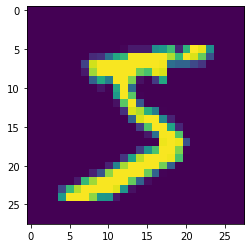

0


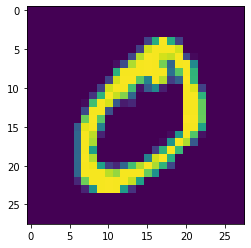

4


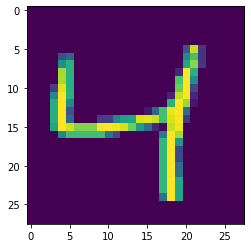

1


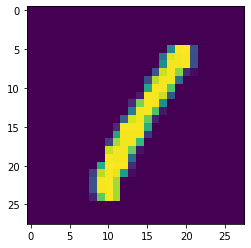

9


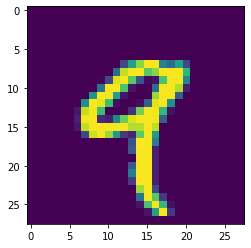

In [ ]:


# Explore data
## YOUR CODE HERE ##
train_loader_p, test_loader_p = get_data_loader(32)
show5(train_loader_p)

In [ ]:
## YOUR CODE HERE ##
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class Net(nn.Module):
    def __init__(self, hidden_size = 512):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size*2)
        self.fc3 = nn.Linear(hidden_size*2, 10) ### number of class is 10 number of digits
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# initialize the NN

In [ ]:
## YOUR CODE HERE ##
def init_loss_optim(model, lr = 0.01):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr)
    return criterion, optimizer

In [ ]:
## YOUR CODE HERE ##
def train(model, n_epochs, train_loader, criterion, optimizer):
    losses = {'train':[], 'test':[]}
    model.train()
    for epoch in range(n_epochs):
        train_loss = 0.0
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()*data.size(0)

        train_loss = train_loss/len(train_loader.dataset)
        losses['train'].append(train_loss)

        print('Epoch: {} \tTraining Loss: {:.6f}'.format(
            epoch+1, 
            train_loss
            ))
    return losses

In [ ]:
def plot_loss(losses):
    fig, ax = plt.subplots()
    plt.plot(losses['train'], label='Training', alpha=0.5)
    plt.title("Training and Testing Losses")
    plt.legend()

In [ ]:
## YOUR CODE HERE ##
def test(model, test_loader, criterion):
    test_loss = 0.0
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))

    model.eval()
    for data, target in test_loader:
        output = model(data)
        loss = criterion(output, target)
        test_loss += loss.item()*data.size(0)
        _, pred = torch.max(output, 1)
        correct = np.squeeze(pred.eq(target.data.view_as(pred)))

        for i in range(16):
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1

    # calculate and print avg test loss
    test_loss = test_loss/len(test_loader.dataset)
    print('Test Loss: {:.6f}\n'.format(test_loss))

    for i in range(10):
        if class_total[i] > 0:
            print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
                str(i), 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))
        else:
            print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

    print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
        100. * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct), np.sum(class_total)))

In [ ]:
def test_case (batch_size = 64, n_epochs = 10, hidden_size = 512, lr = 0.01):
    train_loader, test_loader = get_data_loader(batch_size)
    model = Net(hidden_size)
    print(model)
    criterion, optimizer = init_loss_optim(model, lr)
    losses = train(model, n_epochs, train_loader, criterion, optimizer)
    plot_loss(losses)
    test(model, test_loader, criterion)
    return model        #for saving

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)
Epoch: 1 	Training Loss: 0.730457
Epoch: 2 	Training Loss: 0.317809
Test Loss: 0.248547

Test Accuracy of     0: 98% (237/241)
Test Accuracy of     1: 97% (282/288)
Test Accuracy of     2: 88% (232/263)
Test Accuracy of     3: 93% (243/261)
Test Accuracy of     4: 93% (253/270)
Test Accuracy of     5: 91% (197/216)
Test Accuracy of     6: 92% (207/223)
Test Accuracy of     7: 91% (241/263)
Test Accuracy of     8: 91% (203/223)
Test Accuracy of     9: 94% (249/264)

Test Accuracy (Overall): 93% (2344/2512)


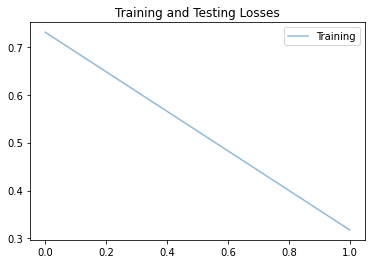

In [ ]:
model = test_case (batch_size = 64, n_epochs = 2, hidden_size = 512, lr = 0.01)

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)
Epoch: 1 	Training Loss: 0.390213
Epoch: 2 	Training Loss: 0.168617
Test Loss: 0.122795

Test Accuracy of     0: 98% (238/241)
Test Accuracy of     1: 98% (284/288)
Test Accuracy of     2: 93% (247/263)
Test Accuracy of     3: 96% (251/261)
Test Accuracy of     4: 95% (258/270)
Test Accuracy of     5: 94% (204/216)
Test Accuracy of     6: 95% (212/223)
Test Accuracy of     7: 94% (249/263)
Test Accuracy of     8: 96% (216/223)
Test Accuracy of     9: 98% (259/264)

Test Accuracy (Overall): 96% (2418/2512)


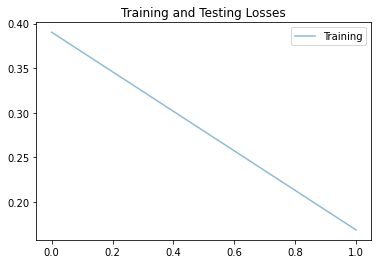

In [ ]:
## YOUR CODE HERE ##

model = test_case (batch_size = 64, n_epochs = 2, hidden_size = 256, lr = 0.05)

In [ ]:
## YOUR CODE HERE ##
model_save_file = "saved_models"
torch.save(model.state_dict(), model_save_file)